# 5) Data Analytics II
1. Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall
on the given dataset.

This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.


In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("social_network_ads.csv")
df=dataset

In [4]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
df.shape

(400, 5)

In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [9]:
df.drop_duplicates()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [10]:
df.shape

(400, 5)

Text(0, 0.5, 'EstimatedSalary')

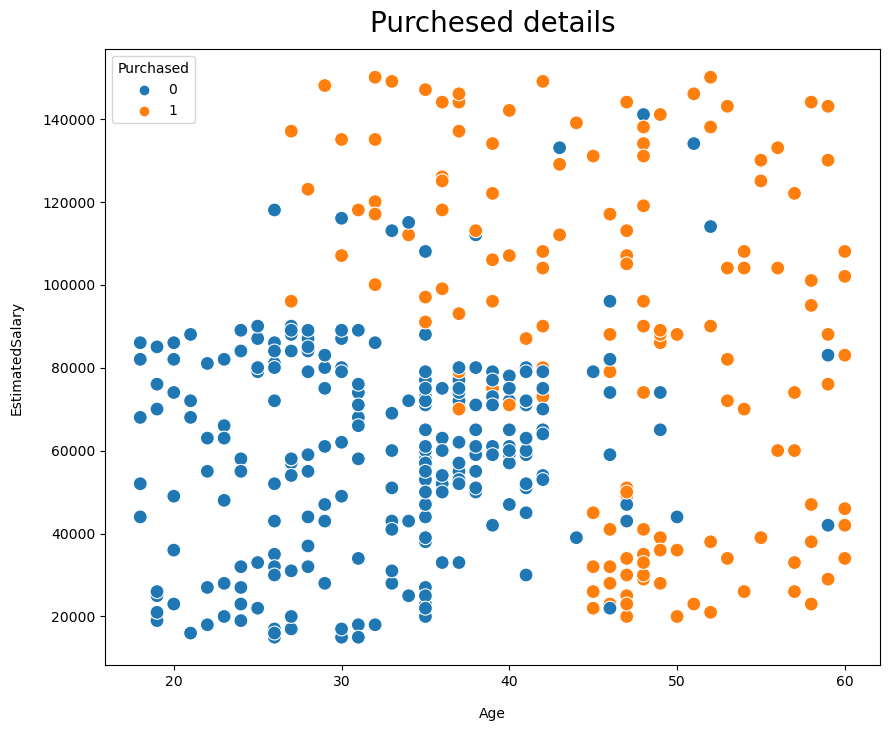

In [11]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Age',y='EstimatedSalary',hue='Purchased',data=df,s=100)
plt.title("Purchesed details",y=1.015,fontsize=20)
plt.xlabel('Age',labelpad=13)
plt.ylabel('EstimatedSalary',labelpad=13)
# ax=plt.gca()

In [12]:
from sklearn.model_selection import train_test_split
x=df[['Age','EstimatedSalary']].values
y=df['Purchased'].values
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state =0)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled  =  scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

2

In [15]:
from sklearn.metrics import confusion_matrix, f1_score,precision_score,recall_score,accuracy_score
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[68,  0],
       [32,  0]], dtype=int64)

In [28]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(68, 0, 32, 0)

In [17]:

p=metrics.precision_score(y_test, y_pred)
r=metrics.recall_score(y_test, y_pred)
a=metrics.accuracy_score(y_test, y_pred)
f1=metrics.f1_score(y_test, y_pred)
print("precision_score:",p)
print("recall_score:",r)
print("accuracy_score:",a)
print("f1_score:",f1)
# metrics.plot_roc_curve(logistic_regression,X_test,y_test)

precision_score: 0.0
recall_score: 0.0
accuracy_score: 0.68
f1_score: 0.0


d:\New folder\envs\ds_env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        68
           1       0.00      0.00      0.00        32

    accuracy                           0.68       100
   macro avg       0.34      0.50      0.40       100
weighted avg       0.46      0.68      0.55       100



d:\New folder\envs\ds_env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\New folder\envs\ds_env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\New folder\envs\ds_env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 23.52222222222222, 'Predicted Label')

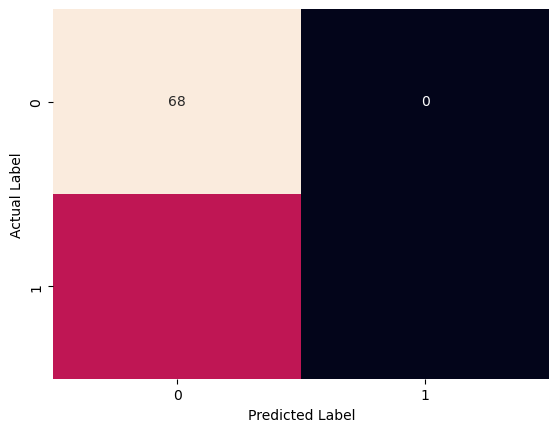

In [29]:
# fig,ax=plt.subplots(figsize=(3,3))
ax=sns.heatmap(cm,annot=True,cbar=False)
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")


In [20]:
# err=(fn+fp)/(tn+fp+fn+tp)

err=1-a
err

0.31999999999999995